In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_functions import Analysis

In [2]:
target_1step_path = "../../results/target_network_loss/uqc_1step"
target_5steps_path = "../../results/observables_uqc/uqc_2qubits_5layers_ZZ"
target_10steps_path = "../../results/target_network_loss/uqc_10steps"
target_50steps_path = "../../results/target_network_loss/uqc_50steps"
target_100steps_path = "../../results/target_network_loss/uqc_100steps"
target_500steps_path = "../../results/target_network_loss/uqc_500steps"
target_1000steps_path = "../../results/target_network_loss/uqc_1000steps"

target_1step = Analysis(target_1step_path)
target_5steps = Analysis(target_5steps_path)
target_10steps = Analysis(target_10steps_path)
target_50steps = Analysis(target_50steps_path)
target_100steps = Analysis(target_100steps_path)
target_500steps = Analysis(target_500steps_path)
target_1000steps = Analysis(target_1000steps_path)

# 1) Performance

In [3]:
target_1step_return = target_1step.get_rewards()
target_5steps_return = target_5steps.get_rewards()
target_10steps_return = target_10steps.get_rewards()
target_50steps_return = target_50steps.get_rewards()
target_100steps_return = target_100steps.get_rewards()
target_500steps_return = target_500steps.get_rewards()
target_1000steps_return = target_1000steps.get_rewards()

target_1step_mean = np.mean(target_1step_return, axis=0)
target_5steps_mean = np.mean(target_5steps_return, axis=0)
target_10steps_mean = np.mean(target_10steps_return, axis=0)
target_50steps_mean = np.mean(target_50steps_return, axis=0)
target_100steps_mean = np.mean(target_100steps_return, axis=0)
target_500steps_mean = np.mean(target_500steps_return, axis=0)
target_1000steps_mean = np.mean(target_1000steps_return, axis=0)

target_1step_std = np.std(target_1step_return, axis=0)
target_5steps_std = np.std(target_5steps_return, axis=0)
target_10steps_std = np.std(target_10steps_return, axis=0)
target_50steps_std = np.std(target_50steps_return, axis=0)
target_100steps_std = np.std(target_100steps_return, axis=0)
target_500steps_std = np.std(target_500steps_return, axis=0)
target_1000steps_std = np.std(target_1000steps_return, axis=0)

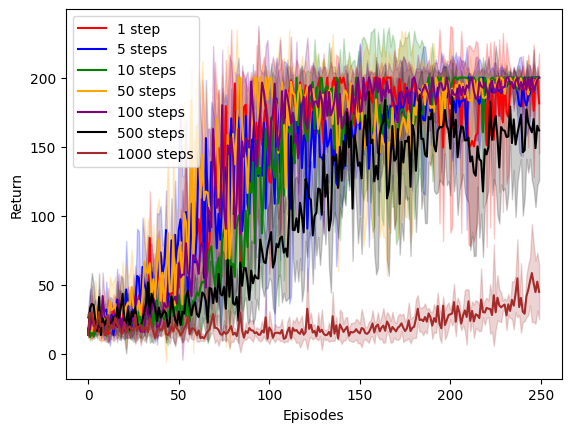

In [4]:
plt.plot(target_1step_mean,color = "red", label="1 step")
plt.fill_between(range(len(target_1step_mean)), target_1step_mean-target_1step_std, target_1step_mean+target_1step_std, alpha=0.2, color="red")
plt.plot(target_5steps_mean,color = "blue", label="5 steps")
plt.fill_between(range(len(target_5steps_mean)), target_5steps_mean-target_5steps_std, target_5steps_mean+target_5steps_std, alpha=0.2, color="blue")
plt.plot(target_10steps_mean,color = "green", label="10 steps")
plt.fill_between(range(len(target_10steps_mean)), target_10steps_mean-target_10steps_std, target_10steps_mean+target_10steps_std, alpha=0.2, color="green")
plt.plot(target_50steps_mean,color = "orange", label="50 steps")
plt.fill_between(range(len(target_50steps_mean)), target_50steps_mean-target_50steps_std, target_50steps_mean+target_50steps_std, alpha=0.2, color="orange")
plt.plot(target_100steps_mean,color = "purple", label="100 steps")
plt.fill_between(range(len(target_100steps_mean)), target_100steps_mean-target_100steps_std, target_100steps_mean+target_100steps_std, alpha=0.2, color="purple")
plt.plot(target_500steps_mean,color = "black", label="500 steps")
plt.fill_between(range(len(target_500steps_mean)), target_500steps_mean-target_500steps_std, target_500steps_mean+target_500steps_std, alpha=0.2, color="black")
plt.plot(target_1000steps_mean,color = "brown", label="1000 steps")
plt.fill_between(range(len(target_1000steps_mean)), target_1000steps_mean-target_1000steps_std, target_1000steps_mean+target_1000steps_std, alpha=0.2, color="brown")
plt.xlabel("Episodes")
plt.ylabel("Return")
plt.legend()
plt.show()


From this figure it seems like the target network actually doesn't have a big impact on the performance of the agents, which is interesting. To further verify that claim, let's calculate the are under the curve for each one of the models.

In [5]:
auc_1step = np.trapz(target_1step_mean)
auc_5steps = np.trapz(target_5steps_mean)
auc_10steps = np.trapz(target_10steps_mean)
auc_50steps = np.trapz(target_50steps_mean)
auc_100steps = np.trapz(target_100steps_mean)
auc_500steps = np.trapz(target_500steps_mean)
auc_1000steps = np.trapz(target_1000steps_mean)

# Calculate which one is the biggest

aucs = [auc_1step, auc_5steps, auc_10steps, auc_50steps, auc_100steps, auc_500steps, auc_1000steps]
aucs_strings = ["1 step", "5 steps", "10 steps", "50 steps", "100 steps", "500 steps", "1000 steps"]

# I have these two lists, each element in the first list corresponds to the element in the second list, and I want to sort the first list in descending order, and then sort the second list in the same way, so that the elements in the second list still correspond to the elements in the first list.
aucs, aucs_strings = zip(*sorted(zip(aucs, aucs_strings), reverse=True))

print("The biggest AUC is for {} with a value of {}".format(aucs_strings[0], aucs[0]))
print("The second biggest AUC is for {} with a value of {}".format(aucs_strings[1], aucs[1]))
print("The third biggest AUC is for {} with a value of {}".format(aucs_strings[2], aucs[2]))
print("The fourth biggest AUC is for {} with a value of {}".format(aucs_strings[3], aucs[3]))
print("The fifth biggest AUC is for {} with a value of {}".format(aucs_strings[4], aucs[4]))
print("The sixth biggest AUC is for {} with a value of {}".format(aucs_strings[5], aucs[5]))
print("The seventh biggest AUC is for {} with a value of {}".format(aucs_strings[6], aucs[6]))

percentages_of_performance = []
for auc in aucs:
    percentage = auc/aucs[0]
    percentages_of_performance.append(percentage)

print("\n")
print("The percentage of performance of the best model for {} is {}".format(aucs_strings[0], percentages_of_performance[0]))
print("The percentage of performance of the best model for {} is {}".format(aucs_strings[1], percentages_of_performance[1]))
print("The percentage of performance of the best model for {} is {}".format(aucs_strings[2], percentages_of_performance[2]))
print("The percentage of performance of the best model for {} is {}".format(aucs_strings[3], percentages_of_performance[3]))
print("The percentage of performance of the best model for {} is {}".format(aucs_strings[4], percentages_of_performance[4]))
print("The percentage of performance of the best model for {} is {}".format(aucs_strings[5], percentages_of_performance[5]))
print("The percentage of performance of the best model for {} is {}".format(aucs_strings[6], percentages_of_performance[6]))

The biggest AUC is for 50 steps with a value of 35943.100000000006
The second biggest AUC is for 1 step with a value of 35278.5
The third biggest AUC is for 100 steps with a value of 34929.3
The fourth biggest AUC is for 5 steps with a value of 33499.75
The fifth biggest AUC is for 10 steps with a value of 32050.700000000004
The sixth biggest AUC is for 500 steps with a value of 24690.799999999996
The seventh biggest AUC is for 1000 steps with a value of 5470.0


The percentage of performance of the best model for 50 steps is 1.0
The percentage of performance of the best model for 1 step is 0.9815096638854187
The percentage of performance of the best model for 100 steps is 0.9717943082260572
The percentage of performance of the best model for 5 steps is 0.9320217232236505
The percentage of performance of the best model for 10 steps is 0.8917066140650083
The percentage of performance of the best model for 500 steps is 0.6869413044506454
The percentage of performance of the best model fo

As we can see, the target network clearly seems to have a not so big impact on the performance of the agents, which is interesting. Actually, 50 steps leads to the best performance and 100 steps to the third best performance.

# 2) Relative Parameter Change

In [6]:
target_1step_parameters_relative_change = target_1step.get_parameters_relative_change()
target_5steps_parameters_relative_change = target_5steps.get_parameters_relative_change()
target_10steps_parameters_relative_change = target_10steps.get_parameters_relative_change()
target_50steps_parameters_relative_change = target_50steps.get_parameters_relative_change()
target_100steps_parameters_relative_change = target_100steps.get_parameters_relative_change()
target_500steps_parameters_relative_change = target_500steps.get_parameters_relative_change()
target_1000steps_parameters_relative_change = target_1000steps.get_parameters_relative_change()

def filter_lists(lists, size = 10000):  # Find the length of the smallest list
    filtered_lists = []
    for lst in lists:
        filtered_lst = lst[:size]  # Take only the first min_length elements
        filtered_lists.append(filtered_lst)  # Add the filtered list to the result
    
    return filtered_lists

target_1step_parameters_relative_change_filtered = filter_lists(target_1step_parameters_relative_change)
target_5steps_parameters_relative_change_filtered = filter_lists(target_5steps_parameters_relative_change)
target_10steps_parameters_relative_change_filtered = filter_lists(target_10steps_parameters_relative_change)
target_50steps_parameters_relative_change_filtered = filter_lists(target_50steps_parameters_relative_change)
target_100steps_parameters_relative_change_filtered = filter_lists(target_100steps_parameters_relative_change)
target_500steps_parameters_relative_change_filtered = filter_lists(target_500steps_parameters_relative_change)
target_1000steps_parameters_relative_change_filtered = filter_lists(target_1000steps_parameters_relative_change, size=4500)

target_1step_parameters_relative_change_mean = np.mean(target_1step_parameters_relative_change_filtered, axis=0)
target_5steps_parameters_relative_change_mean = np.mean(target_5steps_parameters_relative_change_filtered, axis=0)
target_10steps_parameters_relative_change_mean = np.mean(target_10steps_parameters_relative_change_filtered, axis=0)
target_50steps_parameters_relative_change_mean = np.mean(target_50steps_parameters_relative_change_filtered, axis=0)
target_100steps_parameters_relative_change_mean = np.mean(target_100steps_parameters_relative_change_filtered, axis=0)
target_500steps_parameters_relative_change_mean = np.mean(target_500steps_parameters_relative_change_filtered, axis=0)
target_1000steps_parameters_relative_change_mean = np.mean(target_1000steps_parameters_relative_change_filtered, axis=0)

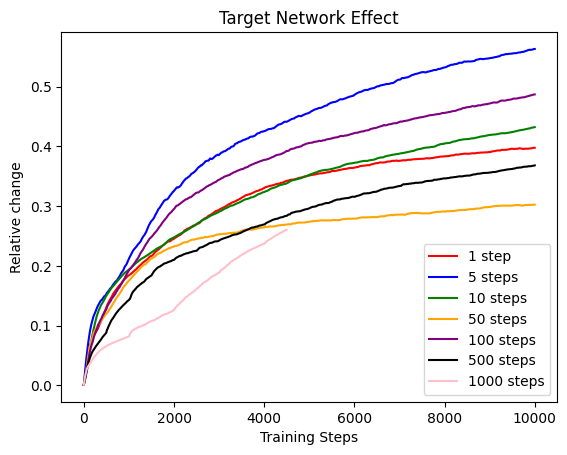

In [7]:
plt.plot(target_1step_parameters_relative_change_mean, color = "red", label="1 step")
plt.plot(target_5steps_parameters_relative_change_mean, color = "blue", label="5 steps")
plt.plot(target_10steps_parameters_relative_change_mean, color = "green", label="10 steps")
plt.plot(target_50steps_parameters_relative_change_mean, color = "orange", label="50 steps")
plt.plot(target_100steps_parameters_relative_change_mean, color = "purple", label="100 steps")
plt.plot(target_500steps_parameters_relative_change_mean, color = "black", label="500 steps")
plt.plot(target_1000steps_parameters_relative_change_mean, color = "pink", label="1000 steps")
plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Relative change")
plt.title("Target Network Effect")
plt.show()

There doesnt seem to be any clear pattern here, and so it seems like the target network doesnt affect the relative parameter change of the agents in a significant way. This makes sense, since the relative parameter change measures the overparametrization of models and in theory the target network update frequency shouldnt affect that. Only the number of qubits and the depth of the quantum circuit should affect it.

# 3) Gradients

This is what I am most interested in studying, becose supposedly the target network changes the landscape of the cost function a lot and so it should affect the gradients of the agents as well. In general, the smaller the target network update frequency, the higher and higher the loss gets, which means that the higher the gradients of the loss function w.r.t the parameters should be. So, we should see the gradients decrease as we increase the number of steps in between target network updates.

In [8]:
target_1step_mean_gradients, target_1step_std_gradients, target_1step_max, target_1step_max_index, target_1step_min, target_1step_min_index = target_1step.calculate_mean_variance_gradients(return_max = True, return_min = True)
target_5steps_mean_gradients, target_5steps_std_gradients, target_5steps_max, target_5steps_max_index, target_5steps_min, target_5steps_min_index = target_5steps.calculate_mean_variance_gradients(return_max = True, return_min = True)
target_10steps_mean_gradients, target_10steps_std_gradients, target_10steps_max, target_10steps_max_index, target_10steps_min, target_10steps_min_index = target_10steps.calculate_mean_variance_gradients(return_max = True, return_min = True)
target_50steps_mean_gradients, target_50steps_std_gradients, target_50steps_max, target_50steps_max_index, target_50steps_min, target_50steps_min_index = target_50steps.calculate_mean_variance_gradients(return_max = True, return_min = True)
target_100steps_mean_gradients, target_100steps_std_gradients, target_100steps_max, target_100steps_max_index, target_100steps_min, target_100steps_min_index = target_100steps.calculate_mean_variance_gradients(return_max = True, return_min = True)
target_500steps_mean_gradients, target_500steps_std_gradients, target_500steps_max, target_500steps_max_index, target_500steps_min, target_500steps_min_index = target_500steps.calculate_mean_variance_gradients(return_max = True, return_min = True)
target_1000steps_mean_gradients, target_1000steps_std_gradients, target_1000steps_max, target_1000steps_max_index, target_1000steps_min, target_1000steps_min_index = target_1000steps.calculate_mean_variance_gradients(return_max = True, return_min = True)

In [9]:
import pandas as pd

target_1step_mean_gradients_smoothed = pd.Series(target_1step_mean_gradients).rolling(250).mean()
target_5steps_mean_gradients_smoothed = pd.Series(target_5steps_mean_gradients).rolling(250).mean()
target_10steps_mean_gradients_smoothed = pd.Series(target_10steps_mean_gradients).rolling(250).mean()
target_50steps_mean_gradients_smoothed = pd.Series(target_50steps_mean_gradients).rolling(250).mean()
target_100steps_mean_gradients_smoothed = pd.Series(target_100steps_mean_gradients).rolling(250).mean()
target_500steps_mean_gradients_smoothed = pd.Series(target_500steps_mean_gradients).rolling(250).mean()
target_1000steps_mean_gradients_smoothed = pd.Series(target_1000steps_mean_gradients).rolling(250).mean()

target_1step_variance_gradients_smoothed = pd.Series(target_1step_std_gradients).rolling(250).mean()
target_5steps_variance_gradients_smoothed = pd.Series(target_5steps_std_gradients).rolling(250).mean()
target_10steps_variance_gradients_smoothed = pd.Series(target_10steps_std_gradients).rolling(250).mean()
target_50steps_variance_gradients_smoothed = pd.Series(target_50steps_std_gradients).rolling(250).mean()
target_100steps_variance_gradients_smoothed = pd.Series(target_100steps_std_gradients).rolling(250).mean()
target_500steps_variance_gradients_smoothed = pd.Series(target_500steps_std_gradients).rolling(250).mean()
target_1000steps_variance_gradients_smoothed = pd.Series(target_1000steps_std_gradients).rolling(250).mean()

In [10]:
# Thus, if the index is between 0 and 9, the gradient is from the rotation parameters, if it is between 10 and 49, it is from the input encoding parameters,
# if it is between 50 and 59 it is a bias and if it is 60 it is the output encoding parameter. I want to group the gradients by type of parameter the max_parameters_gradient_index

def classify_gradient(list_of_indexes):
    new_list = []
    for i in range(len(list_of_indexes)):
        if list_of_indexes[i] < 10:
            new_list.append(0)
        elif list_of_indexes[i] < 50:
            new_list.append(1)
        elif list_of_indexes[i] < 60:
            new_list.append(2)
        else:
            new_list.append(3)
    return new_list

colors = ["red", "blue", "green", "orange", "purple"]
labels = [f"Agent {i+1}" for i in range(5)]
values_max_1step = [classify_gradient(target_1step_max_index[i]) for i in range(len(target_1step_max_index))]
values_max_5steps = [classify_gradient(target_5steps_max_index[i]) for i in range(len(target_5steps_max_index))]
values_max_10steps = [classify_gradient(target_10steps_max_index[i]) for i in range(len(target_10steps_max_index))]
values_max_50steps = [classify_gradient(target_50steps_max_index[i]) for i in range(len(target_50steps_max_index))]
values_max_100steps = [classify_gradient(target_100steps_max_index[i]) for i in range(len(target_100steps_max_index))]
values_max_500steps = [classify_gradient(target_500steps_max_index[i]) for i in range(len(target_500steps_max_index))]
values_max_1000steps = [classify_gradient(target_1000steps_max_index[i]) for i in range(len(target_1000steps_max_index))]
values_min_1step = [classify_gradient(target_1step_min_index[i]) for i in range(len(target_1step_min_index))]
values_min_5steps = [classify_gradient(target_5steps_min_index[i]) for i in range(len(target_5steps_min_index))]
values_min_10steps = [classify_gradient(target_10steps_min_index[i]) for i in range(len(target_10steps_min_index))]
values_min_50steps = [classify_gradient(target_50steps_min_index[i]) for i in range(len(target_50steps_min_index))]
values_min_100steps = [classify_gradient(target_100steps_min_index[i]) for i in range(len(target_100steps_min_index))]
values_min_500steps = [classify_gradient(target_500steps_min_index[i]) for i in range(len(target_500steps_min_index))]
values_min_1000steps = [classify_gradient(target_1000steps_min_index[i]) for i in range(len(target_1000steps_min_index))]


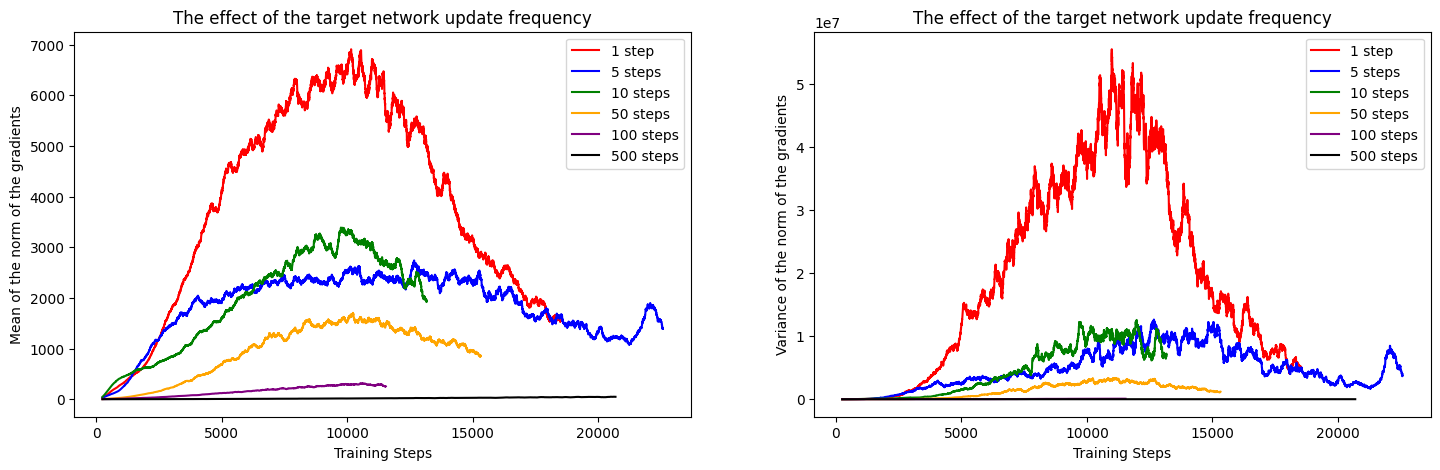

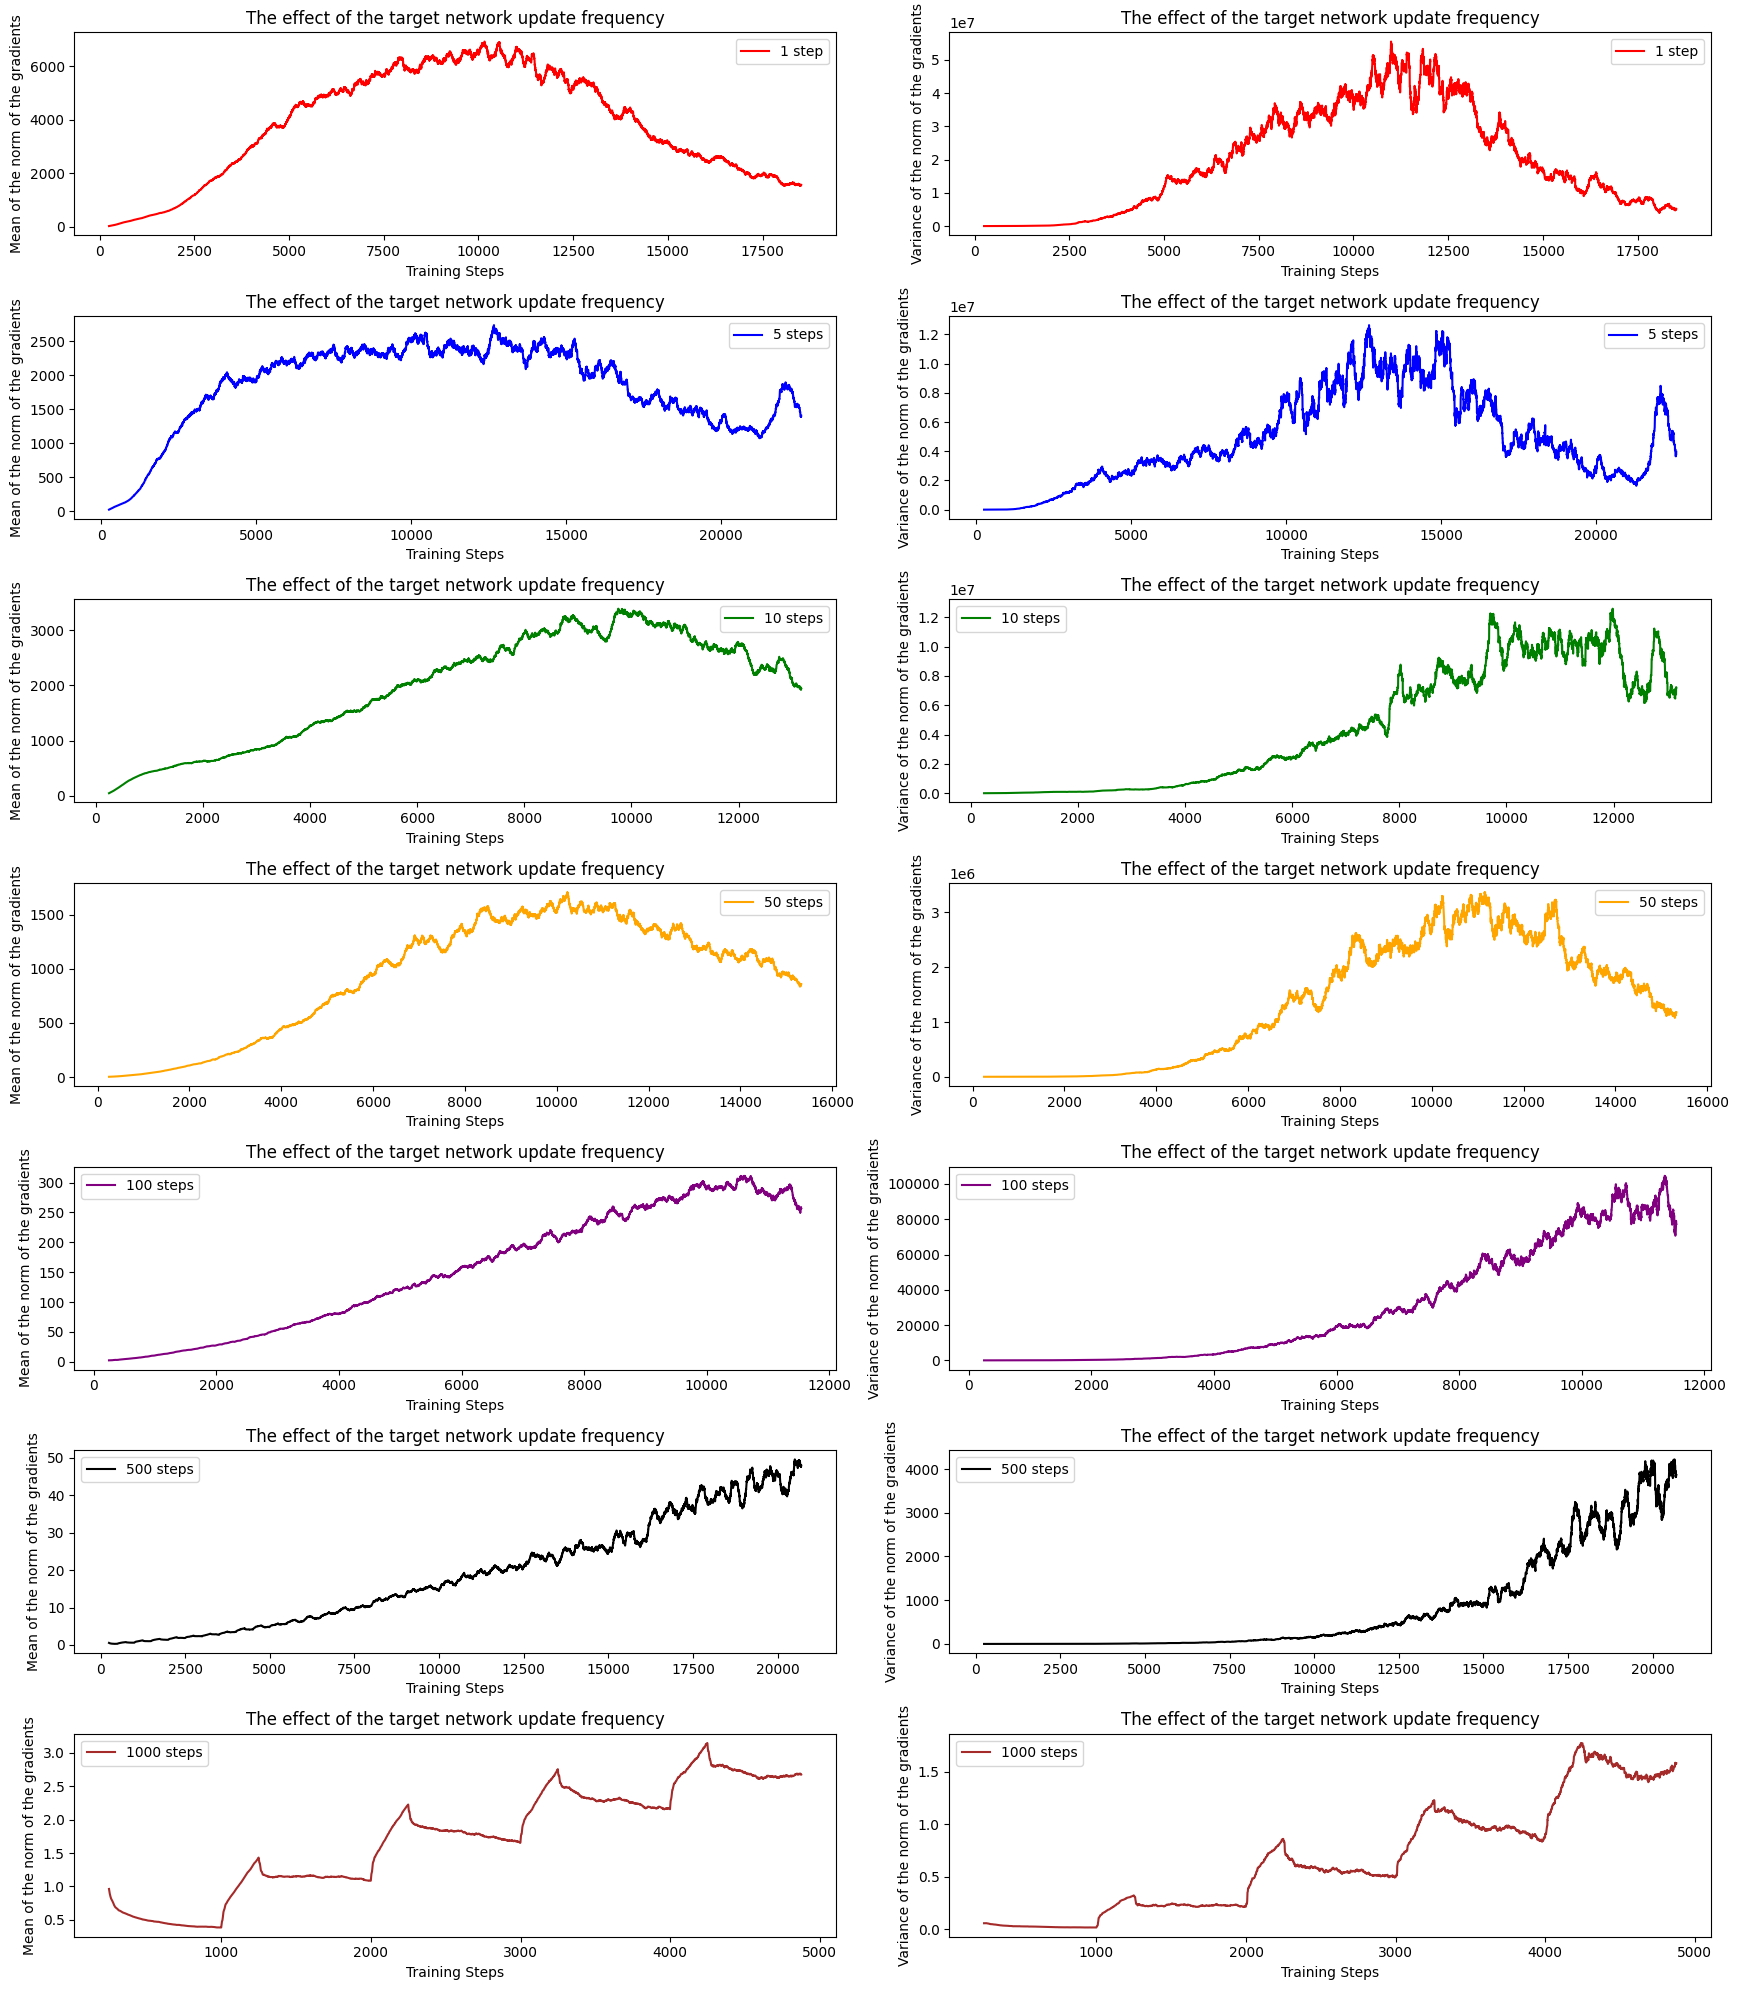

In [14]:
#fig, axs = plt.subplots(8, 2, figsize=(15, 17.5), tight_layout=True)
#axs[0,0].plot(target_1step_mean_gradients_smoothed, color = "red", label="1 step")
#axs[0,0].plot(target_5steps_mean_gradients_smoothed, color = "blue", label="5 steps")
#axs[0,0].plot(target_10steps_mean_gradients_smoothed, color = "green", label="10 steps")
#axs[0,0].plot(target_50steps_mean_gradients_smoothed, color = "orange", label="50 steps")
#axs[0,0].plot(target_100steps_mean_gradients_smoothed, color = "purple", label="100 steps")
#axs[0,0].plot(target_500steps_mean_gradients_smoothed, color = "black", label="500 steps")
#axs[0,0].plot(target_1000steps_mean_gradients_smoothed, color = "brown", label="1000 steps")
#axs[0,0].legend()
#axs[0,0].set_xlabel("Training Steps")
#axs[0,0].set_ylabel("Mean of the norm of the gradients")
#axs[0,0].set_title("The effect of the target network update frequency")
#
#axs[0,1].plot(target_1step_variance_gradients_smoothed, color = "red", label="1 step")
#axs[0,1].plot(target_5steps_variance_gradients_smoothed, color = "blue", label="5 steps")
#axs[0,1].plot(target_10steps_variance_gradients_smoothed, color = "green", label="10 steps")
#axs[0,1].plot(target_50steps_variance_gradients_smoothed, color = "orange", label="50 steps")
#axs[0,1].plot(target_100steps_variance_gradients_smoothed, color = "purple", label="100 steps")
#axs[0,1].plot(target_500steps_variance_gradients_smoothed, color = "black", label="500 steps")
#axs[0,1].plot(target_1000steps_variance_gradients_smoothed, color = "brown", label="1000 steps")
#axs[0,1].legend()
#axs[0,1].set_xlabel("Training Steps")
#axs[0,1].set_ylabel("Variance of the norm of the gradients")
#axs[0,1].set_title("The effect of the target network update frequency")
#
#axs[1,0].hist(values_max_1step, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[1,0].legend()
#axs[1,0].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[1,0].set_title("Distribution of the parameter with the highest gradient 1 step")
#
#axs[1,1].hist(values_max_5steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors[:4], label = labels)
#axs[1,1].legend()
#axs[1,1].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[1,1].set_title("Distribution of the parameter with the highest gradient 5 steps")
#
#axs[2,0].hist(values_max_10steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[2,0].legend()
#axs[2,0].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[2,0].set_title("Distribution of the parameter with the highest gradient 10 steps")
#
#axs[2,1].hist(values_max_50steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[2,1].legend()
#axs[2,1].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[2,1].set_title("Distribution of the parameter with the highest gradient 50 steps")
#
#axs[3,0].hist(values_max_100steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[3,0].legend()
#axs[3,0].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[3,0].set_title("Distribution of the parameter with the highest gradient 100 steps")
#
#axs[3,1].hist(values_max_500steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[3,1].legend()
#axs[3,1].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[3,1].set_title("Distribution of the parameter with the highest gradient 500 steps")
#
#axs[4,0].hist(values_max_1000steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[4,0].legend()
#axs[4,0].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[4,0].set_title("Distribution of the parameter with the highest gradient 1000 steps")
#
#axs[4,1].hist(values_min_1step, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[4,1].legend()
#axs[4,1].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[4,1].set_title("Distribution of the parameter with the lowest gradient 1 step")
#axs[5,0].hist(values_min_5steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors[:4], label = labels)
#axs[5,0].legend()
#axs[5,0].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[5,0].set_title("Distribution of the parameter with the lowest gradient 5 steps")
#
#axs[5,1].hist(values_min_10steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[5,1].legend()
#axs[5,1].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[5,1].set_title("Distribution of the parameter with the lowest gradient 10 steps")
#axs[6,0].hist(values_min_50steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[6,0].legend()
#axs[6,0].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[6,0].set_title("Distribution of the parameter with the lowest gradient 50 steps")
#
#axs[6,1].hist(values_min_100steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[6,1].legend()
#axs[6,1].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[6,1].set_title("Distribution of the parameter with the lowest gradient 100 steps")
#axs[7,0].hist(values_min_1000steps, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
#axs[7,0].legend()
#axs[7,0].set_xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])
#axs[7,0].set_title("Distribution of the parameter with the lowest gradient 1000 steps")
#
#plt.show()

fig, axs = plt.subplots(1, 2, figsize=(17.5, 5))

axs[0].plot(target_1step_mean_gradients_smoothed, color = "red", label="1 step")
axs[0].plot(target_5steps_mean_gradients_smoothed, color = "blue", label="5 steps")
axs[0].plot(target_10steps_mean_gradients_smoothed, color = "green", label="10 steps")
axs[0].plot(target_50steps_mean_gradients_smoothed, color = "orange", label="50 steps")
axs[0].plot(target_100steps_mean_gradients_smoothed, color = "purple", label="100 steps")
axs[0].plot(target_500steps_mean_gradients_smoothed, color = "black", label="500 steps")
axs[0].legend()
axs[0].set_xlabel("Training Steps")
axs[0].set_ylabel("Mean of the norm of the gradients")
axs[0].set_title("The effect of the target network update frequency")

axs[1].plot(target_1step_variance_gradients_smoothed, color = "red", label="1 step")
axs[1].plot(target_5steps_variance_gradients_smoothed, color = "blue", label="5 steps")
axs[1].plot(target_10steps_variance_gradients_smoothed, color = "green", label="10 steps")
axs[1].plot(target_50steps_variance_gradients_smoothed, color = "orange", label="50 steps")
axs[1].plot(target_100steps_variance_gradients_smoothed, color = "purple", label="100 steps")
axs[1].plot(target_500steps_variance_gradients_smoothed, color = "black", label="500 steps")
axs[1].legend()
axs[1].set_xlabel("Training Steps")
axs[1].set_ylabel("Variance of the norm of the gradients")
axs[1].set_title("The effect of the target network update frequency")

plt.show()

fig, axs = plt.subplots(7, 2, figsize=(17.5, 20), tight_layout=True)


axs[0,0].plot(target_1step_mean_gradients_smoothed, color = "red", label="1 step")
axs[0,0].legend()
axs[0,0].set_xlabel("Training Steps")
axs[0,0].set_ylabel("Mean of the norm of the gradients")
axs[0,0].set_title("The effect of the target network update frequency")


axs[0,1].plot(target_1step_variance_gradients_smoothed, color = "red", label="1 step")
axs[0,1].legend()
axs[0,1].set_xlabel("Training Steps")
axs[0,1].set_ylabel("Variance of the norm of the gradients")
axs[0,1].set_title("The effect of the target network update frequency")

axs[1,0].plot(target_5steps_mean_gradients_smoothed, color = "blue", label="5 steps")
axs[1,0].legend()
axs[1,0].set_xlabel("Training Steps")
axs[1,0].set_ylabel("Mean of the norm of the gradients")
axs[1,0].set_title("The effect of the target network update frequency")
axs[1,1].plot(target_5steps_variance_gradients_smoothed, color = "blue", label="5 steps")
axs[1,1].legend()
axs[1,1].set_xlabel("Training Steps")
axs[1,1].set_ylabel("Variance of the norm of the gradients")
axs[1,1].set_title("The effect of the target network update frequency")

axs[2,0].plot(target_10steps_mean_gradients_smoothed, color = "green", label="10 steps")
axs[2,0].legend()
axs[2,0].set_xlabel("Training Steps")
axs[2,0].set_ylabel("Mean of the norm of the gradients")
axs[2,0].set_title("The effect of the target network update frequency")
axs[2,1].plot(target_10steps_variance_gradients_smoothed, color = "green", label="10 steps")
axs[2,1].legend()
axs[2,1].set_xlabel("Training Steps")
axs[2,1].set_ylabel("Variance of the norm of the gradients")
axs[2,1].set_title("The effect of the target network update frequency")

axs[3,0].plot(target_50steps_mean_gradients_smoothed, color = "orange", label="50 steps")
axs[3,0].legend()
axs[3,0].set_xlabel("Training Steps")
axs[3,0].set_ylabel("Mean of the norm of the gradients")
axs[3,0].set_title("The effect of the target network update frequency")
axs[3,1].plot(target_50steps_variance_gradients_smoothed, color = "orange", label="50 steps")
axs[3,1].legend()
axs[3,1].set_xlabel("Training Steps")
axs[3,1].set_ylabel("Variance of the norm of the gradients")
axs[3,1].set_title("The effect of the target network update frequency")

axs[4,0].plot(target_100steps_mean_gradients_smoothed, color = "purple", label="100 steps")
axs[4,0].legend()
axs[4,0].set_xlabel("Training Steps")
axs[4,0].set_ylabel("Mean of the norm of the gradients")
axs[4,0].set_title("The effect of the target network update frequency")
axs[4,1].plot(target_100steps_variance_gradients_smoothed, color = "purple", label="100 steps")
axs[4,1].legend()
axs[4,1].set_xlabel("Training Steps")
axs[4,1].set_ylabel("Variance of the norm of the gradients")
axs[4,1].set_title("The effect of the target network update frequency")

axs[5,0].plot(target_500steps_mean_gradients_smoothed, color = "black", label="500 steps")
axs[5,0].legend()
axs[5,0].set_xlabel("Training Steps")
axs[5,0].set_ylabel("Mean of the norm of the gradients")
axs[5,0].set_title("The effect of the target network update frequency")
axs[5,1].plot(target_500steps_variance_gradients_smoothed, color = "black", label="500 steps")
axs[5,1].legend()
axs[5,1].set_xlabel("Training Steps")
axs[5,1].set_ylabel("Variance of the norm of the gradients")
axs[5,1].set_title("The effect of the target network update frequency")

axs[6,0].plot(target_1000steps_mean_gradients_smoothed, color = "brown", label="1000 steps")
axs[6,0].legend()
axs[6,0].set_xlabel("Training Steps")
axs[6,0].set_ylabel("Mean of the norm of the gradients")
axs[6,0].set_title("The effect of the target network update frequency")
axs[6,1].plot(target_1000steps_variance_gradients_smoothed, color = "brown", label="1000 steps")
axs[6,1].legend()
axs[6,1].set_xlabel("Training Steps")
axs[6,1].set_ylabel("Variance of the norm of the gradients")
axs[6,1].set_title("The effect of the target network update frequency")

plt.show()


As we can see, the results are exactly as expected, as the target network update frequency decreases, so do the gradients, and massively. If we plot the loss functions, we should also see massive differences between the different models, once again the loss should become lower and lower as the target network update frequency decreases.

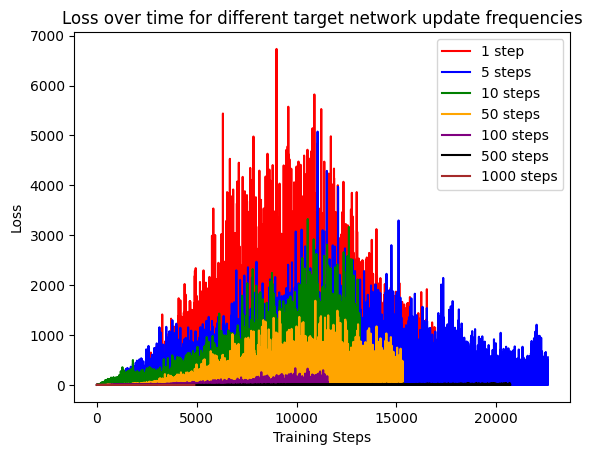

Text(0, 0.5, 'Loss')

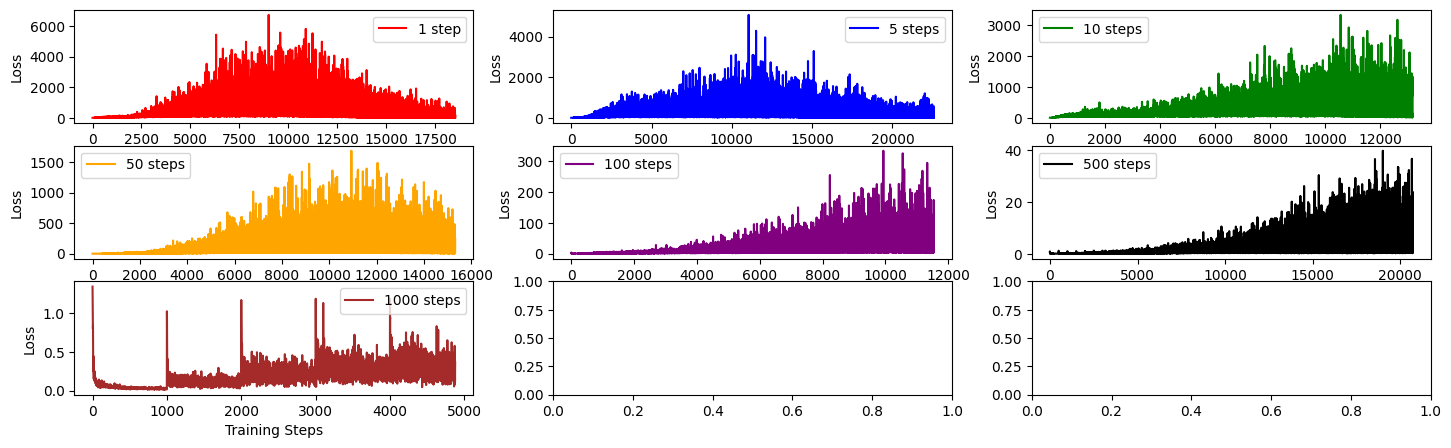

In [12]:
target_1step_loss = target_1step.get_loss()
target_5steps_loss = target_5steps.get_loss()
target_10steps_loss = target_10steps.get_loss()
target_50steps_loss = target_50steps.get_loss()
target_100steps_loss = target_100steps.get_loss()
target_500steps_loss = target_500steps.get_loss()
target_1000steps_loss = target_1000steps.get_loss()

# Each loss is a list of 5 lists of different training steps, and we need to make them all the same length

min_length_1step = min([len(target_1step_loss[i]) for i in range(5)])
min_length_5steps = min([len(target_5steps_loss[i]) for i in range(4)])
min_length_10steps = min([len(target_10steps_loss[i]) for i in range(5)])
min_length_50steps = min([len(target_50steps_loss[i]) for i in range(5)])
min_length_100steps = min([len(target_100steps_loss[i]) for i in range(5)])
min_length_500steps = min([len(target_500steps_loss[i]) for i in range(5)])
min_length_1000steps = min([len(target_1000steps_loss[i]) for i in range(5)])

for i in range(5):
    target_1step_loss[i] = target_1step_loss[i][:min_length_1step]
    target_10steps_loss[i] = target_10steps_loss[i][:min_length_10steps]
    target_50steps_loss[i] = target_50steps_loss[i][:min_length_50steps]
    target_100steps_loss[i] = target_100steps_loss[i][:min_length_100steps]
    target_500steps_loss[i] = target_500steps_loss[i][:min_length_500steps]
    target_1000steps_loss[i] = target_1000steps_loss[i][:min_length_1000steps]

for i in range(4):
    target_5steps_loss[i] = target_5steps_loss[i][:min_length_5steps]

target_1step_loss_mean = np.mean(target_1step_loss, axis = 0)
target_5steps_loss_mean = np.mean(target_5steps_loss, axis = 0)
target_10steps_loss_mean = np.mean(target_10steps_loss, axis = 0)
target_50steps_loss_mean = np.mean(target_50steps_loss, axis = 0)
target_100steps_loss_mean = np.mean(target_100steps_loss, axis = 0)
target_500steps_loss_mean = np.mean(target_500steps_loss, axis = 0)
target_1000steps_loss_mean = np.mean(target_1000steps_loss, axis = 0)

plt.plot(target_1step_loss_mean, color = "red", label="1 step")
plt.plot(target_5steps_loss_mean, color = "blue", label="5 steps")
plt.plot(target_10steps_loss_mean, color = "green", label="10 steps")
plt.plot(target_50steps_loss_mean, color = "orange", label="50 steps")
plt.plot(target_100steps_loss_mean, color = "purple", label="100 steps")
plt.plot(target_500steps_loss_mean, color = "black", label="500 steps")
plt.plot(target_1000steps_loss_mean, color = "brown", label="1000 steps")
plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Loss over time for different target network update frequencies")
plt.show()

fig, axs = plt.subplots(3,3, figsize=(17.5, 5))
axs[0,0].plot(target_1step_loss_mean, color = "red", label="1 step")
axs[0,0].legend()
axs[0,0].set_xlabel("Training Steps")
axs[0,0].set_ylabel("Loss")

axs[0,1].plot(target_5steps_loss_mean, color = "blue", label="5 steps")
axs[0,1].legend()
axs[0,1].set_xlabel("Training Steps")
axs[0,1].set_ylabel("Loss")

axs[0,2].plot(target_10steps_loss_mean, color = "green", label="10 steps")
axs[0,2].legend()
axs[0,2].set_xlabel("Training Steps")
axs[0,2].set_ylabel("Loss")

axs[1,0].plot(target_50steps_loss_mean, color = "orange", label="50 steps")
axs[1,0].legend()
axs[1,0].set_xlabel("Training Steps")
axs[1,0].set_ylabel("Loss")

axs[1,1].plot(target_100steps_loss_mean, color = "purple", label="100 steps")
axs[1,1].legend()
axs[1,1].set_xlabel("Training Steps")
axs[1,1].set_ylabel("Loss")

axs[1,2].plot(target_500steps_loss_mean, color = "black", label="500 steps")
axs[1,2].legend()
axs[1,2].set_xlabel("Training Steps")
axs[1,2].set_ylabel("Loss")

axs[2,0].plot(target_1000steps_loss_mean, color = "brown", label="1000 steps")
axs[2,0].legend()
axs[2,0].set_xlabel("Training Steps")
axs[2,0].set_ylabel("Loss")

